In [1]:
# Student Mark predictor - Eaaa, Autumn 2021

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Mads\AppData\Local\Temp\ipykernel_6764\2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('StudentGrades.csv')

In [4]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [5]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [6]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


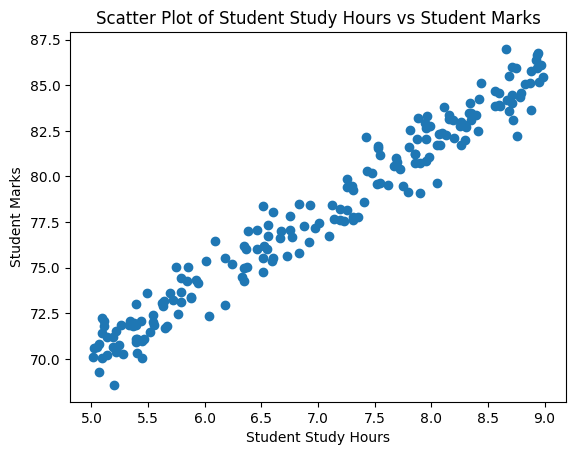

In [7]:
plt.scatter(x = df.study_hours, y = df.student_marks)
plt.xlabel("Student Study Hours")
plt.ylabel("Student Marks")
plt.title("Scatter Plot of Student Study Hours vs Student Marks")
plt.show()

In [8]:
# Remove empty cells

In [9]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [10]:
df2 = df.fillna(df.mean())

In [11]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [12]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [13]:
# Split the dataset

In [14]:
X = df2.drop("student_marks", axis = "columns")
y = df2.drop("study_hours", axis = "columns")

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=51 )
print ("Shape of X_train = ", X_train.shape)
print ("Shape of y_train = ", y_train.shape)
print ("Shape of X_test = ", X_test.shape)
print ("Shape of y_test = ", y_test.shape)

Shape of X_train =  (160, 1)
Shape of y_train =  (160, 1)
Shape of X_test =  (40, 1)
Shape of y_test =  (40, 1)


In [16]:
# y = m*x + c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [17]:
lr.fit(X_train , y_train)

LinearRegression()

In [18]:
y_pred = lr.predict(X_test)

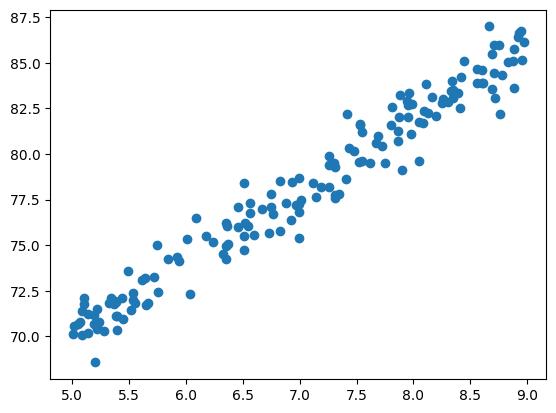

In [19]:
plt.scatter(X_train,y_train)

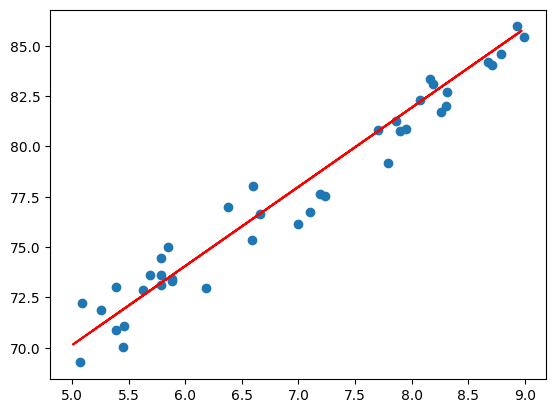

In [20]:
plt.scatter(X_test,y_test)
plt.plot(X_train, lr.predict(X_train), color = "r" )

[[ 5.19       70.66      ]
 [ 7.99       82.75      ]
 [ 7.72       80.43      ]
 [ 8.3        82.84      ]
 [ 8.88       85.78      ]
 [ 6.92       76.38      ]
 [ 8.05       79.63      ]
 [ 5.65       71.7       ]
 [ 7.52       79.56      ]
 [ 6.75       77.82      ]
 [ 7.67       80.58      ]
 [ 5.4        71.1       ]
 [ 6.73       75.65      ]
 [ 7.31       77.77      ]
 [ 5.64       73.19      ]
 [ 8.39       83.37      ]
 [ 6.37       75.04      ]
 [ 5.37       71.8       ]
 [ 6.93       78.45      ]
 [ 8.35       83.08      ]
 [ 5.33       71.85      ]
 [ 5.92       74.34      ]
 [ 6.46       76.02      ]
 [ 6.99594872 75.39      ]
 [ 6.35       74.97      ]
 [ 7.95       82.03      ]
 [ 5.34       72.1       ]
 [ 6.55       76.03      ]
 [ 6.51       78.39      ]
 [ 5.2        68.57      ]
 [ 8.56       83.88      ]
 [ 7.12       78.42      ]
 [ 7.26       79.41      ]
 [ 8.2        82.1       ]
 [ 8.95       85.15      ]
 [ 7.41       78.61      ]
 [ 6.56       76.74      ]
 

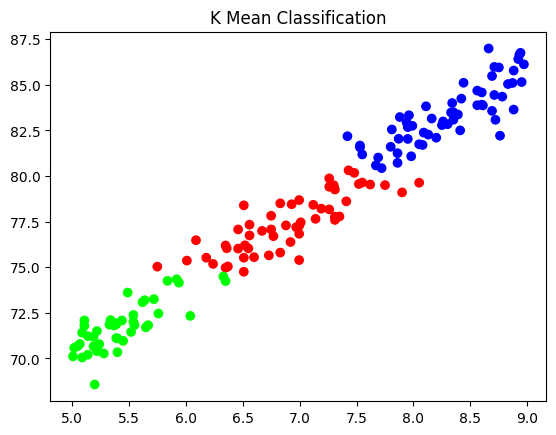

In [28]:
from sklearn.cluster import KMeans

combined = np.column_stack((X_train, y_train))
print(combined)

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(combined)

colormap = np.array(['red', 'lime', 'blue', 'yellow', 'green', 'red']) 
labels = kmeans.labels_
plt.scatter(X_train, y_train, c=colormap[labels])
plt.title('K Mean Classification')

plt.show()